# Laboratory I
## task 1 Image comparison metrics

JPEG (604, 604) RGB


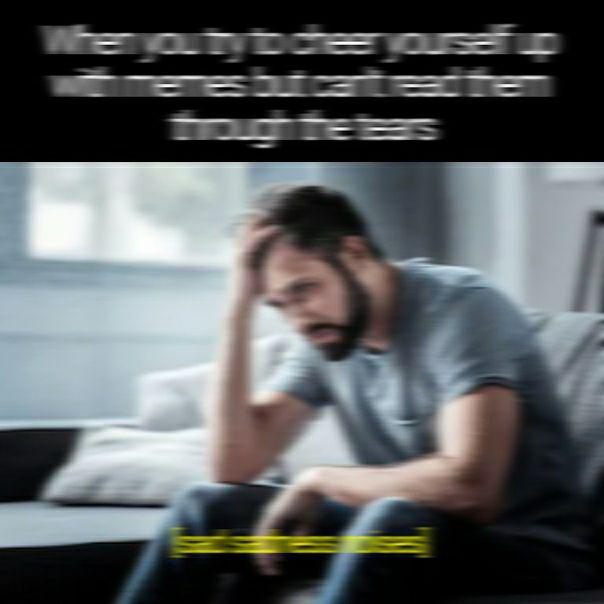

In [1]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
#Read image
im = Image.open( 'ph.jpg' )
#Display logo of univesity of dream
print(im.format, im.size, im.mode)
im

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision.transforms as transforms
torch.manual_seed(1)

In [3]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()
#curve=curves[0].flatten()
a=cv2.cvtColor(np.array(im), cv2.COLOR_BGR2GRAY)
t_curve=Variable((to_tensor(im)))
t_curve.dtype

torch.float32

In [4]:
#mse
def mse(A,B):
    A = cv2.cvtColor(np.array(A), cv2.COLOR_BGR2GRAY)
    B = cv2.cvtColor(np.array(B), cv2.COLOR_BGR2GRAY)
    error=np.sum((A.astype(float)-B.astype(float))**2)/(float(A.shape[0]*A.shape[1]))
    return error

In [5]:
def ssim(A,B):
    A = cv2.cvtColor(np.array(A), cv2.COLOR_BGR2GRAY)
    B = cv2.cvtColor(np.array(B), cv2.COLOR_BGR2GRAY)
    k1=0.01
    k2=0.03
    cov=np.mean((A-np.mean(A))*(B-np.mean(B)))
    c1=(k1*255)**2
    c2=(k2*255)**2
    first=(2*np.mean(A)*np.mean(B)+c1)
    second=(2*cov+c2)
    third=(np.mean(A))**2+(np.mean(B))**2+c1
    four=(np.std(A))**2+(np.std(B))**2+c2
    return (first*second)/(third*four)

In [6]:
print('ssim: ',ssim(np.array(im),np.array(im)))
print('MSE: ',mse(np.array(im),np.array(im)))    

ssim:  1.0
MSE:  0.0


task 1.1.

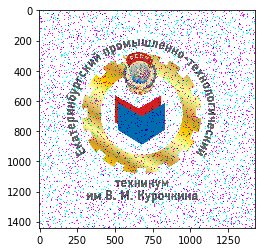

In [7]:

#Add some noise for original image
def noisy(image):
    row,col,ch = image.shape
    s_vs_p = 0.8
    amount = 0.04
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    out[coords] = 1

    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
    out[coords] = 0
    return out
new=noisy(np.array(im))
plt.imshow(new)

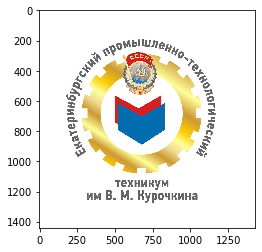

In [19]:
np.array

In [8]:
print('ssim: ',ssim(np.array(im),np.array(new)))
print('MSE: ',mse(np.array(im),np.array(new)))

ssim:  0.8187163048161721
MSE:  1211.2775480768296


noise was been added, and as we can see SSIM shows us better results

# Task 2
# HDR Dataset creation

task 2.1
photos were made

In [91]:
im1 = Image.open( '1.jpg' )
im2 = Image.open( '2.jpg' )
im3 = Image.open( '3.jpg' )
im4 = Image.open( '4.jpg' )
im5 = Image.open( '5.jpg' )

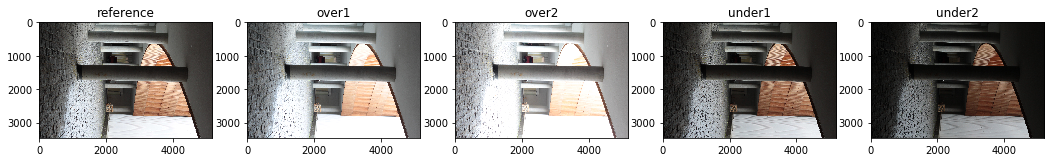

In [92]:
plt.figure(figsize=(18, 6))
plt.subplot(151)
plt.title('reference')
plt.imshow(im1)
plt.subplot(152)
plt.title('over1')
plt.imshow(im2)
plt.subplot(153)
plt.title('over2')
plt.imshow(im3)
plt.subplot(154)
plt.title('under1')
plt.imshow(im4)
plt.subplot(155)
plt.title('under2')
plt.imshow(im5)

In [95]:
# print('ssim: ',ssim(np.array(im),np.array(new)))
# print('MSE: ',mse(np.array(im),np.array(new)))
photoset=[im1,im2,im3,im4,im5]
types=['reference','over1','over2','under1','under2']
for i in range(len(photoset)):
    for j in range(len(photoset)):
        print('mse between ',str(types[i]),str(types[j]),': ',mse(np.array(photoset[i]),np.array(photoset[j])))
        print('SSIM between ',str(types[i]),str(types[j]),': ',ssim(np.array(photoset[i]),np.array(photoset[j])))
        print('______________________________________')

mse between  reference reference :  0.0
SSIM between  reference reference :  1.0
______________________________________
mse between  reference over1 :  1891.750794768715
SSIM between  reference over1 :  0.9259816772130969
______________________________________
mse between  reference over2 :  6894.57237709021
SSIM between  reference over2 :  0.7659125123024846
______________________________________
mse between  reference under1 :  1849.750381727877
SSIM between  reference under1 :  0.8736202840400893
______________________________________
mse between  reference under2 :  5098.02093586793
SSIM between  reference under2 :  0.6389321710193059
______________________________________
mse between  over1 reference :  1891.750794768715
SSIM between  over1 reference :  0.9259816772130969
______________________________________
mse between  over1 over1 :  0.0
SSIM between  over1 over1 :  1.0
______________________________________
mse between  over1 over2 :  1805.001409808849
SSIM between  over1 ove

As we can see here when we have image from different groups(under,over) mse is pretty high especially if over2 under2 or similar situation and SSIM is law.
when images from the same group mse not so high and SSIM about 0.8 or 0.9
if we compare with reference SSIM is almost normal for each picture, and MSE better for under1 and over1

# Task 3
# Fourier Filtering

In [ ]:
#Task 3.1

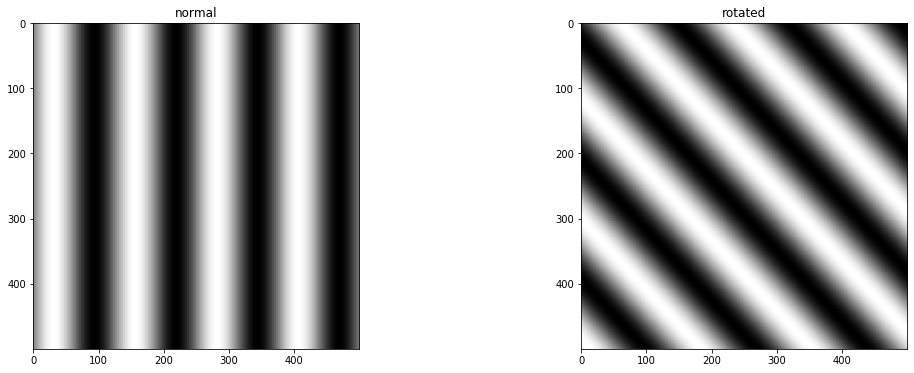

In [160]:
def sine_pattern(angle,delta):
    x=np.linspace(-100,100,500)
    y=np.linspace(-100,100,500) 
    xx,yy=np.meshgrid(x,y)
    result=np.sin((xx*np.cos(angle/np.pi)-yy*np.sin(angle/np.pi))*2*np.pi/delta)
    return result

r=sine_pattern(0,50)
r_angle=sine_pattern(180,50)
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('normal')
plt.imshow(r,cmap='gray')
plt.subplot(122)
plt.title('rotated')
plt.imshow(r_angle,cmap='gray')



([], <a list of 0 Text yticklabel objects>)

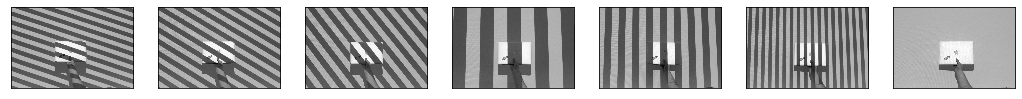

In [5]:
#Task 3.2
im1 = Image.open( 's1.jpg' )
im2 = Image.open( 's2.jpg' )
im3 = Image.open( 's3.jpg' )
im4 = Image.open( 's4.jpg' )
im5 = Image.open( 's5.jpg' )
im6 = Image.open( 's6.jpg' )
im7 = Image.open( 's7.jpg' )
plt.figure(figsize=(18, 10))
plt.subplot(171)
plt.imshow(im1)
plt.xticks([])
plt.yticks([])
plt.subplot(172)
plt.imshow(im2)
plt.xticks([])
plt.yticks([])
plt.subplot(173)
plt.imshow(im3)
plt.xticks([])
plt.yticks([])
plt.subplot(174)
plt.imshow(im4)
plt.xticks([])
plt.yticks([])
plt.subplot(175)
plt.imshow(im5)
plt.xticks([])
plt.yticks([])
plt.subplot(176)
plt.imshow(im6)
plt.xticks([])
plt.yticks([])
plt.subplot(177)
plt.imshow(im7)
plt.xticks([])
plt.yticks([])

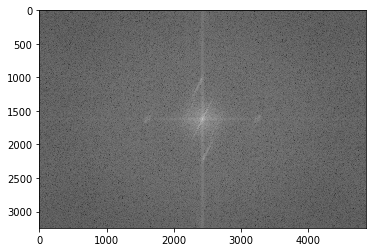

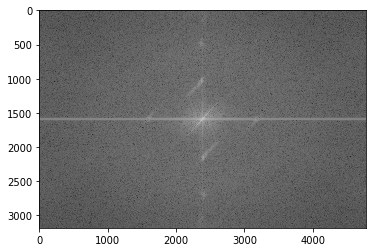

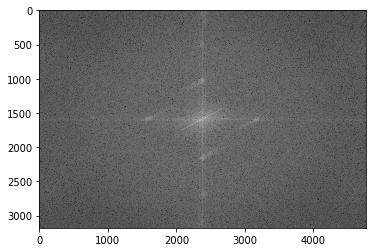

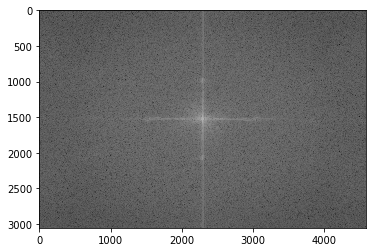

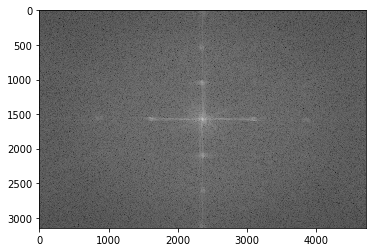

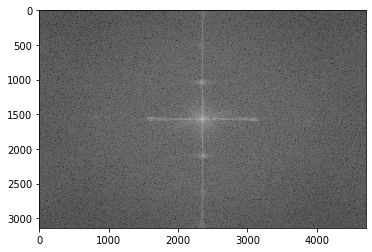

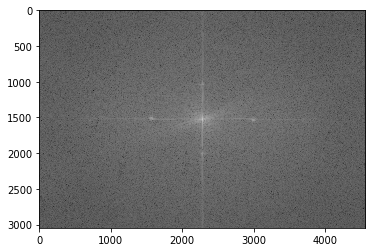

In [6]:
photoset=[im1,im2,im3,im4,im5,im6,im7]

for i in range(len(photoset)):
    image=cv2.cvtColor(np.array(photoset[i]), cv2.COLOR_BGR2GRAY)
    fft_im=np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
    plt.imshow(fft_im,cmap='gray')
    plt.show()




as we can see if we have vertical strides, then we have additional spikes.

Task 3.5

In [7]:
fft_images=[]
for i in range(len(photoset)):
    image=cv2.cvtColor(np.array(photoset[i]), cv2.COLOR_BGR2GRAY)
    fft_images.append(np.log(np.abs(np.fft.fftshift(np.fft.fft2(image)))))

In [118]:
image=cv2.cvtColor(np.array(im4), cv2.COLOR_BGR2GRAY)
f=((np.abs(np.fft.fftshift(np.fft.fft2(image)))))
a=f.copy()


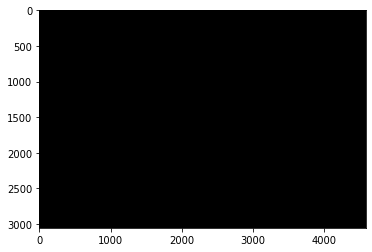

In [119]:
plt.imshow(a,cmap='gray')

In [121]:
a[1527:1533]=0


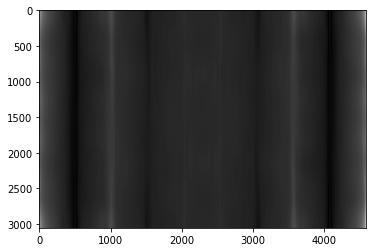

In [129]:
plt.imshow((np.abs(np.fft.ifft2(np.fft.ifftshift(f-a)))),cmap='gray')


# Task 4

In [81]:
near = Image.open( 'near.jpg' )
middle = Image.open( 'middle.jpg' )
far = Image.open( 'far.jpg' )
reference = Image.open( 'reference.jpg' )


([], <a list of 0 Text yticklabel objects>)

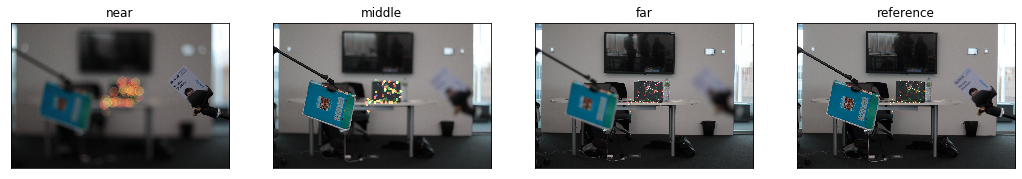

In [83]:
plt.figure(figsize=(18, 10))
plt.subplot(141)
plt.imshow(near)
plt.title('near')
plt.xticks([])
plt.yticks([])
plt.subplot(142)
plt.imshow(middle)
plt.title('middle')
plt.xticks([])
plt.yticks([])
plt.subplot(143)
plt.imshow(far)
plt.title('far')
plt.xticks([])
plt.yticks([])
plt.subplot(144)
plt.imshow(reference)
plt.title('reference')
plt.xticks([])
plt.yticks([])

In [86]:
photoset=[near,middle,far,reference]
types=['near','middle','far','reference']
for i in range(len(photoset)):
    for j in range(len(photoset)):
        print('mse between ',str(types[i]),str(types[j]),': ',mse(np.array(photoset[i]),np.array(photoset[j])))
        print('SSIM between ',str(types[i]),str(types[j]),': ',ssim(np.array(photoset[i]),np.array(photoset[j])))
        print('______________________________________')

mse between  near near :  0.0
SSIM between  near near :  1.0
______________________________________
mse between  near middle :  1044.9094350472071
SSIM between  near middle :  0.8859678419776851
______________________________________
mse between  near far :  1169.6633861177197
SSIM between  near far :  0.8616477353869545
______________________________________
mse between  near reference :  1229.3234441867962
SSIM between  near reference :  0.8581596233145369
______________________________________
mse between  middle near :  1044.9094350472071
SSIM between  middle near :  0.8859678419776851
______________________________________
mse between  middle middle :  0.0
SSIM between  middle middle :  1.0
______________________________________
mse between  middle far :  279.90275126502127
SSIM between  middle far :  0.9630965114511623
______________________________________
mse between  middle reference :  232.46473959672926
SSIM between  middle reference :  0.9700047759125743
___________________

comparison near with other photos lead to high mse and less SSIM, with comparison other focuses non so much difference

In [132]:
#task 4.3
second=np.ones((3,3))

In [141]:
first=np.zeros((3,3))
first[1][1]=2

In [166]:
kernel=(first-(1/9)*second)
np.array(near).shape

(3456, 5184, 3)

In [168]:
image=cv2.cvtColor(np.array(near), cv2.COLOR_BGR2GRAY)
kernel_fft=np.abs(np.fft.fft2(kernel,image.shape))
near_fft=np.abs(np.fft.fft2(near))

In [170]:
sharp=near_fft*np.array(near)


In [ ]:
for i in range(len(photoset)):
    sharp=photoset[i]*kernel
    
    

# Task 5

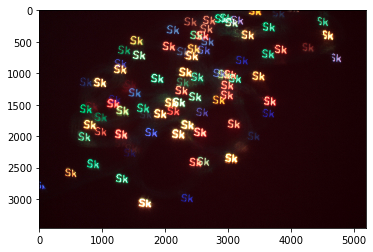

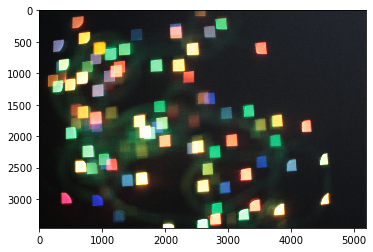

In [155]:
one = Image.open( 'IMG_1.jpg' )
two = Image.open( 'squares.jpg' )
plt.imshow(one)
plt.show()
plt.imshow(two)
plt.show()